# Clustering Census Data with Divergences

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib.patches as mpatches
from json import loads
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

<h3>Abstract</h3>

<h3>Motivation</h3>


Classifying census blocks map based on similar distributions of age, language, racial demographics

Intuitivly, a $1\% \rightarrow 5\%$ is more significant than a $ 80\% \rightarrow 84\%$ change


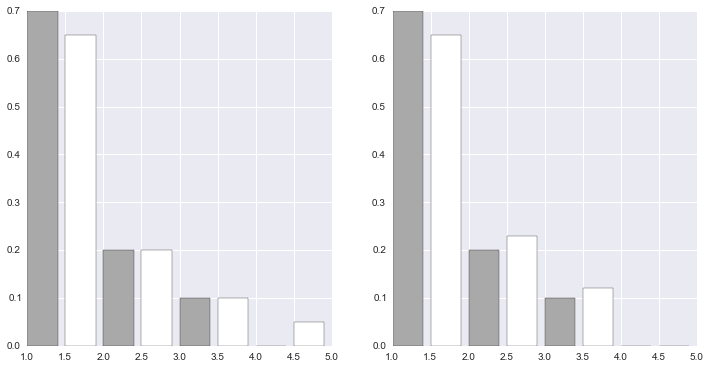

In [3]:
a1 = np.array([0.7, 0.2, 0.1, 0.0])
b1 = np.array([0.65, 0.2, 0.1, 0.05])
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
ax[0].bar([1, 2, 3, 4], a1, color="darkgrey", width=0.4)
ax[0].bar([1.5, 2.5, 3.5, 4.5], b1, color="white", width=0.4)


a2 = np.array([0.7, 0.2, 0.1, 0.0])
b2 = np.array([0.65, 0.23, 0.12, 0.0])
ax[1].bar([1, 2, 3, 4], a2, color="darkgrey", width=0.4)
ax[1].bar([1.5, 2.5, 3.5, 4.5], b2, color="white", width=0.4)
plt.show()

<h3>Minkowski Distances</h3>
$$\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$$

Where $P$ and $Q$ are vectors of length n.  If we treat our count data as points in n dimensional space, the distance is heavily related to overall population.   standardization to a percent bounds between 0 and 1, resulting in ...

<h3>Cosine Similarity</h3>
Let A, B be vectors of length n containing the original counts from the data
$$\theta = cos^{-1}\frac{(A \cdot B)}{||A|| \ ||B||}$$

The result of this for census data will be that $0 \leq \theta \leq \frac{\pi}{2}$
<h3>KL-Divergence</h3>
talk about f-divergences, symmetric kl-divergence.

Suppose that $D$ is a multinomial distribution with $k$ different parameters. Then the value of each parameter can be estimated as

$$ E[k_i] = \frac{X = i}{n} $$

Where $\sum \limits_{i=1}^k E[k_i] = 1$

We can treat the population breakdown percentage of each census block as the estimates of paramters for a specific realization from a multinomial distributions.  Thinking of the population now as a random variable, the most meaningful comparison is a distance between probability distrubtions, The KL-divergence.  To satisfy the requirements of a distance measure, the summetricized KL divergence is used

$$\frac{1}{2}D(P || Q) + \frac{1}{2}D(Q || p)$$

<h3>Jensen-Shannon Divergence</h3>
Instead of computing M as the average of the probabilities, we add the counts and then recompute new probabilities

$$JSD(P||Q) = \frac{1}{2}D(P||M) + \frac{1}{2}D(Q||M)$$

Where $M = \frac{1}{2}(Q + P)$


<h3>Majority / Largest Minority</h3>
Common for racial demographics, formally

$$ D(x, y) = \{ 0 \ if \ argmax(x) = argmax(y) \ else \ 1 \}$$

Where x and y are the original count vectors.


<h3>Method</h3>
Updating Cluster Centers - use default methods first

Consider unique method, does it work better?

Instead of taking the cluster center as the mean of the members of probabilities, take it as the probability of the sum of the counts


<h3>Modeling</h3>
Talk about different clustering methodologies, conclude with choice and reasons

<h3>Applications</h3>
Some specific visualizations produced by faceting on grouping

<h3>Citations</h3>
http://www.researchgate.net/profile/Flemming_Topsoe/publication/4109004_Jensen-Shannon_divergence_and_Hilbert_space_embedding/links/0c9605249611e4c842000000.pdf

In [4]:
data = pd.read_csv("/Users/jonahwilliams/pdb2014bgv9_us.csv")
data = data[data.State_name == 'California']
data = data[(data.County_name == "Contra Costa County") |
            (data.County_name == "San Francisco County") |
            (data.County_name == "Alameda County") |
            (data.County_name == "San Mateo County") |
            (data.County_name == "Santa Clara County") |
            (data.County_name == "Solano County") |
            (data.County_name == "Sonoma County") |
            (data.County_name == "Napa County") |
            (data.County_name == "Marin County")
           ]
data = data[['GIDBG','Hispanic_CEN_2010',
            'NH_White_alone_CEN_2010',
            'NH_Blk_alone_CEN_2010',
            'NH_AIAN_alone_CEN_2010',
            'NH_Asian_alone_CEN_2010',
            'NH_NHOPI_alone_CEN_2010',
            'NH_SOR_alone_CEN_2010']].copy()
data.index = data.GIDBG
data = data.drop('GIDBG', axis=1)

In [5]:
data = data + 1
data['Total'] = data.sum(axis=1)
data = data[data['Total'] > 7]
data = data.drop(['Total'], axis=1)
data.head()

Hispanic_CEN_2010  NH_White_alone_CEN_2010  \
GIDBG                                                     
60014001001                118                     2079   
60014002001                 67                      834   
60014002002                 86                      714   
60014003001                 84                      808   
60014003002                140                      856   

             NH_Blk_alone_CEN_2010  NH_AIAN_alone_CEN_2010  \
GIDBG                                                        
60014001001                    141                       3   
60014002001                      7                       2   
60014002002                     26                       2   
60014003001                     40                       1   
60014003002                     91                       2   

             NH_Asian_alone_CEN_2010  NH_NHOPI_alone_CEN_2010  \
GIDBG                                                           
60014001001                      457                        9   
60014002001                       63                        1   
60014002002                       85                        1   
60014003001                       96                        3   
60014003002                      130                        2   

             NH_SOR_alone_CEN_2010  
GIDBG                               
60014001001                     26  
60014002001                      2  
60014002002                      3  
60014003001                      4  
60014003002                      7

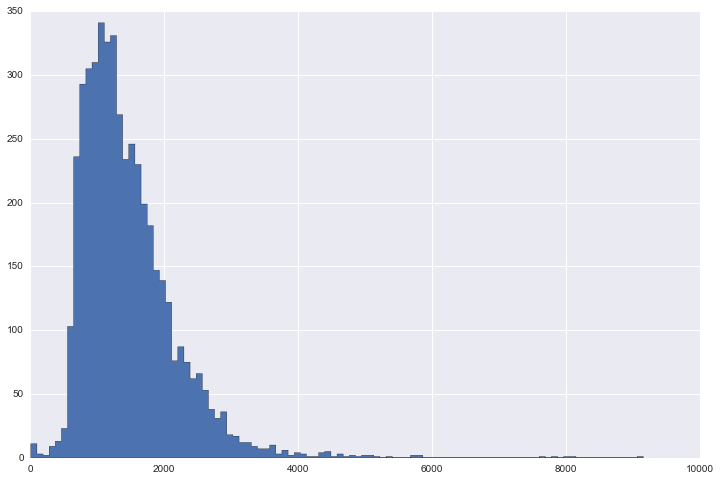

In [6]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
plt.hist(np.sum(data, axis=1).values, histtype="stepfilled", bins=100)
plt.show()

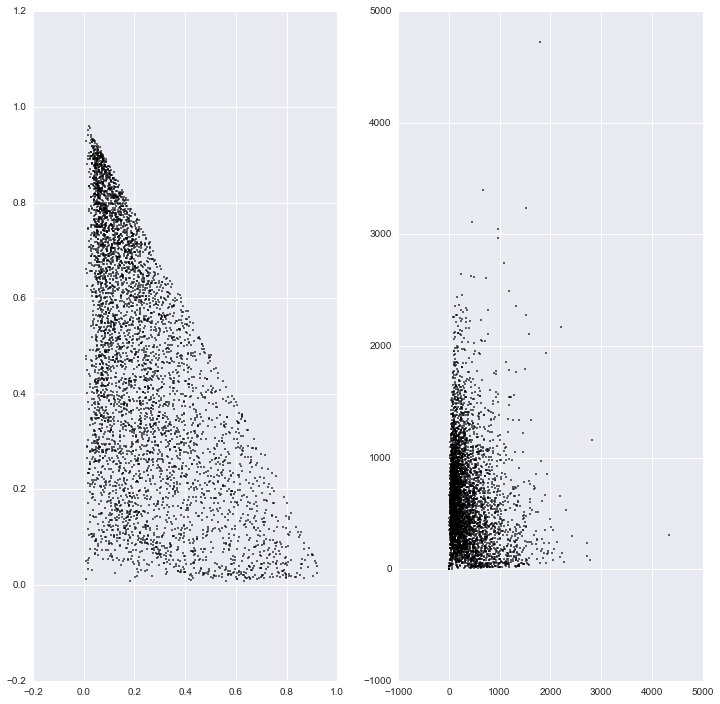

In [7]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False)
fig.set_size_inches(12, 12)

ax[1].scatter(data["Hispanic_CEN_2010"],
                    data["NH_White_alone_CEN_2010"],
                    s=2, color="black")

x = np.divide(data["Hispanic_CEN_2010"], np.sum(data, axis=1)).values
y = np.divide(data["NH_White_alone_CEN_2010"], np.sum(data, axis=1)).values
ax[0].scatter(x, y, s=2, color="black")
plt.show()

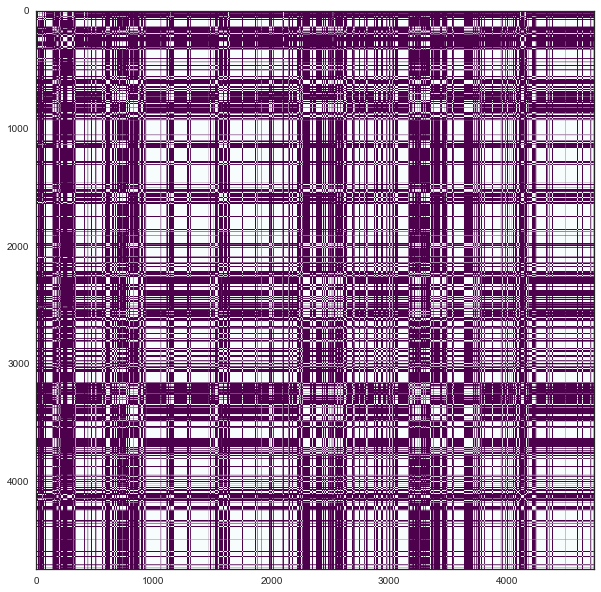

In [63]:
#Majority Distance Matrix
argraw = np.argmax(data.values, axis=1)
n = len(data)
majority = np.zeros((n,n), np.int)

for i in xrange(n):
    for j in xrange(i, n):
        d = int(argraw[i] != argraw[j])
        majority[i][j] = d
        majority[j][i] = d
        
sns.set_style("white")
plt.figure(figsize=(10,10))
plt.imshow(majority, cmap="BuPu")
plt.show()

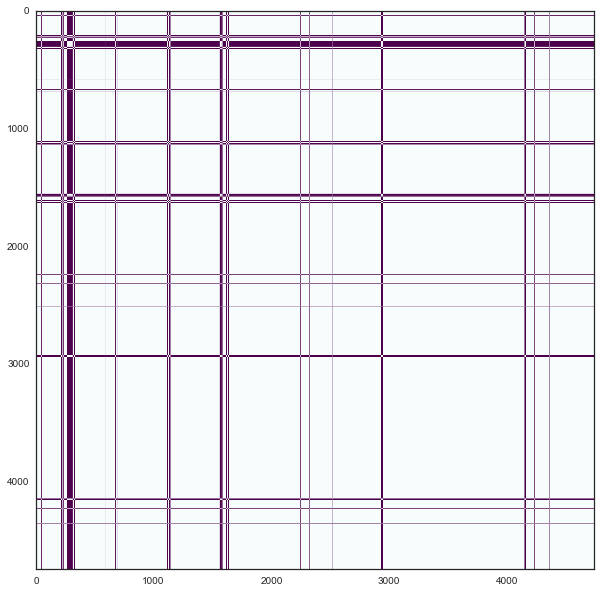

In [64]:
#Largest Minority
argraw = np.argsort(data.values, axis=1)[:, 1]
n = len(data)
minority = np.zeros((n,n), np.int)

for i in xrange(n):
    for j in xrange(i, n):
        d = int(argraw[i] != argraw[j])
        minority[i][j] = d
        minority[j][i] = d
        
sns.set_style("white")
plt.figure(figsize=(10,10))
plt.imshow(minority, cmap="BuPu")
plt.show()

<h3>Limitations of the Above measures</h3>
Because 'distance' is strictly 0 or 1, we are limited to a maximum number of classes - the number of columns of our data.  

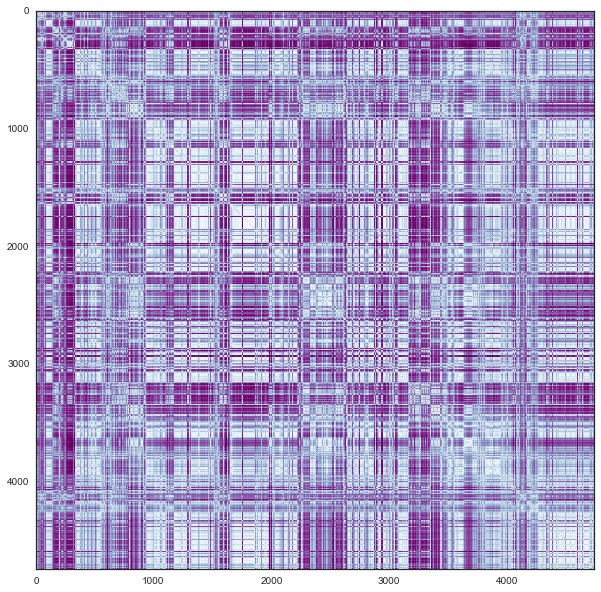

In [8]:
# Calculate Cosine Similarity Distance Matrix
magnitudes = np.sqrt(np.sum(np.square(data), axis=1).values)
raw = data.values
n = len(data)

cossim = np.zeros((n,n), np.float64)

for i in xrange(n):
    for j in xrange(i, n):
        cossim[i, j] = np.divide(np.dot(raw[i], raw[j]), magnitudes[i] * magnitudes[j])
        cossim[j, i] = np.divide(np.dot(raw[i], raw[j]), magnitudes[i] * magnitudes[j])
        
cossim = np.arccos(cossim)

sns.set_style("white")
plt.figure(figsize=(10,10))
plt.imshow(cossim, cmap="BuPu")
plt.show()

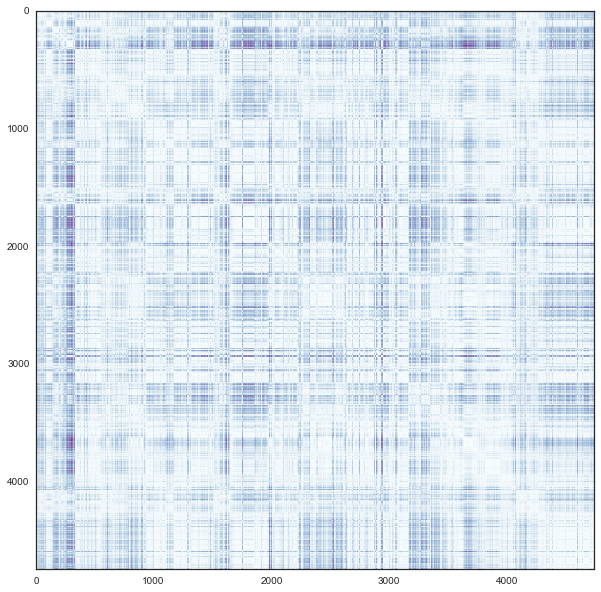

In [9]:
# Calculate KL Divergence Distance Matrix
reduction = np.divide(data, np.sum(data, axis=1)[:,np.newaxis]).values
n = len(reduction)
entropies = np.sum((reduction * np.log(reduction)), axis=1)
logs = np.log(reduction)
kull_lieb = np.zeros((n, n), np.float64)

for i in xrange(n):
    for j in xrange(i, n):
        d = entropies[i] + entropies[j] - np.dot(reduction[j], logs[i]) - np.dot(reduction[i], logs[j])
        kull_lieb[j, i] = d
        kull_lieb[i, j] = d
kull_lieb = kull_lieb /  2

sns.set_style("white")
plt.figure(figsize=(10,10))
plt.imshow(kull_lieb, cmap="BuPu")
plt.show()

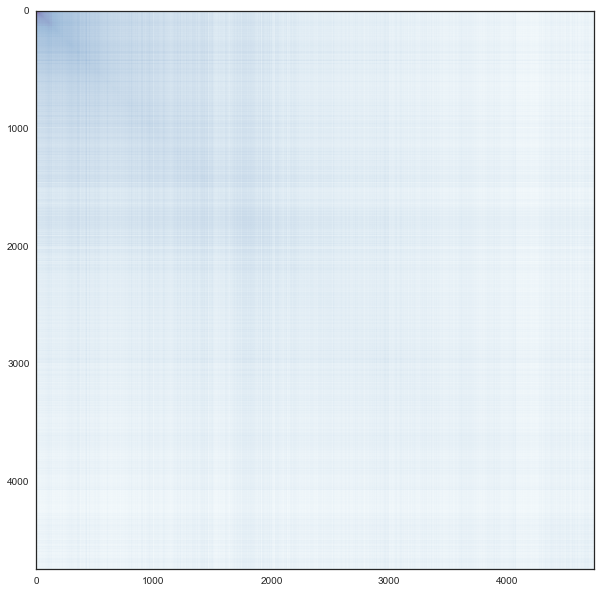

In [31]:
# Calculate Jensen-Shannon divergence Matrix
p = np.divide(data, np.sum(data, axis=1)[:,np.newaxis]).values
n = len(p)
jensen_shannon = np.zeros((n, n), np.float64)
for i in xrange(n):
    for j in xrange(i, n):
        M = (p[i] + [j]) / 2
        d = np.dot(p[i], np.log(p[i] / M)) + np.dot(p[j], np.log(p[j] / M))
        jensen_shannon[j, i] = d
        jensen_shannon[i, j] = d
jensen_shannon = jensen_shannon /  2

sns.set_style("white")
plt.figure(figsize=(10,10))
plt.imshow(jensen_shannon, cmap="BuPu")
plt.show()

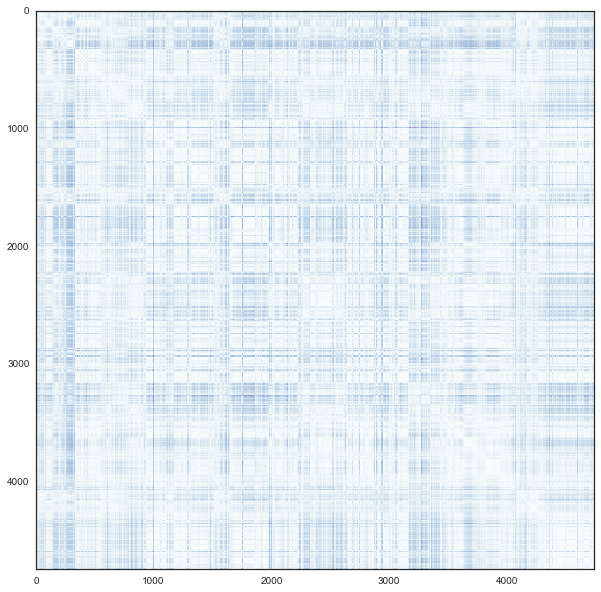

In [45]:
# Modified Jensen Shannon
# Calculate Jensen-Shannon divergence Matrix

raw = data.values[:, 0:7]
p = np.divide(raw, np.sum(raw, axis=1)[:,np.newaxis])
n = len(p)
mod_jensen_shannon = np.zeros((n, n), np.float64)

for i in xrange(n):
    for j in xrange(i, n):
        M = np.divide(raw[i] + raw[j], np.sum(raw[i] + raw[j]))
        d = np.dot(p[i], np.log(p[i] / M)) + np.dot(p[j], np.log(p[j] / M))
        mod_jensen_shannon[j, i] = d
        mod_jensen_shannon[i, j] = d
mod_jensen_shannon = mod_jensen_shannon /  2

sns.set_style("white")
plt.figure(figsize=(10,10))
plt.imshow(mod_jensen_shannon, cmap="BuPu")
plt.show()

<h3>Comparing Comparisons</h3>
Since Largest Minority weighting has a maximum of 5 classes for our particular dataset, we will compare the above distances using sklearns AgglomerativeClustering with 5 clusters as a standard

In [57]:
from sklearn.cluster import AgglomerativeClustering
data['pred_kl'] = AgglomerativeClustering(n_clusters=5,
                        affinity="precomputed", linkage="average").fit_predict(kull_lieb)

data['pred_js'] = AgglomerativeClustering(n_clusters=5,
                        affinity="precomputed", linkage="average").fit_predict(jensen_shannon)

data['pred_cos'] = AgglomerativeClustering(n_clusters=5,
                        affinity="precomputed", linkage="average").fit_predict(np.nan_to_num(cossim))

data['pred_modjs'] = AgglomerativeClustering(n_clusters=5,
                        affinity="precomputed", linkage="average").fit_predict(mod_jensen_shannon)

In [74]:
data['pred_minority'] = np.argsort(data.values[:,0:7])[:,1]

def make_map(data, column):
    colors = sns.color_palette("husl", 5)
    sns.set_style("white")
    fig = plt.figure() 
    ax = fig.gca()
    fig.set_size_inches(16, 12)

    map_data = loads(open("/Users/jonahwilliams/Downloads/california_bg.json","r").read())

    for item in map_data['features']:
        poly = item['geometry']
        bg = int(item['properties']['GEOID'])
        try: 
            a = data.loc[bg, column]
            ax.add_patch(PolygonPatch(poly, fc=colors[int(a) - 2], ec="black", alpha=0.9, zorder=2 ))
        except:
            pass
    
    ax.set_xlim(-122.8, -122)
    ax.set_ylim(37.5, 38)
    plt.show()

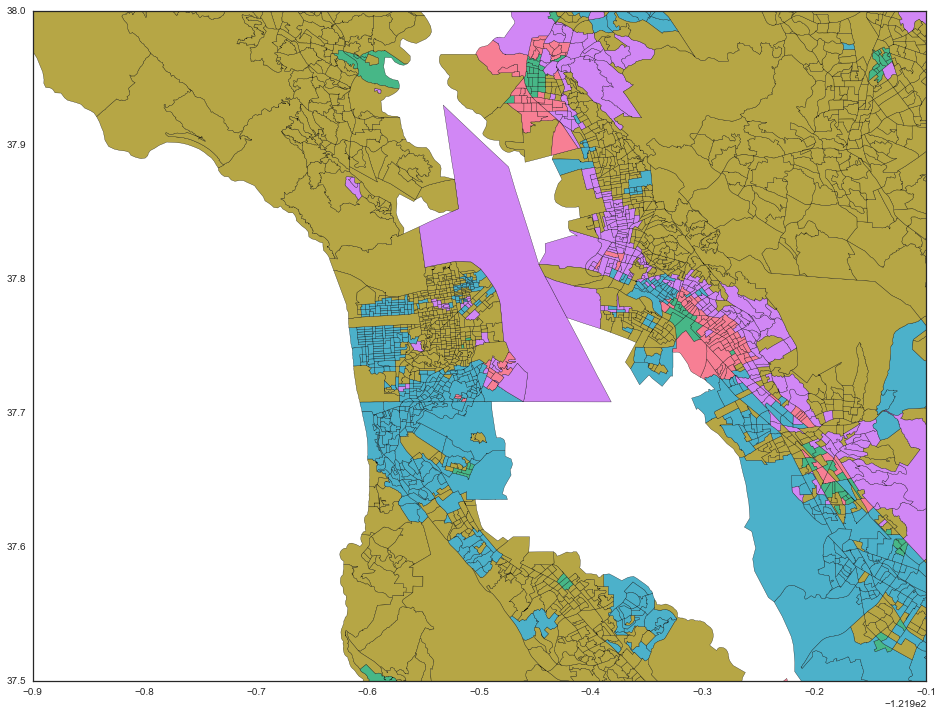

In [59]:
make_map(data, "pred_kl")

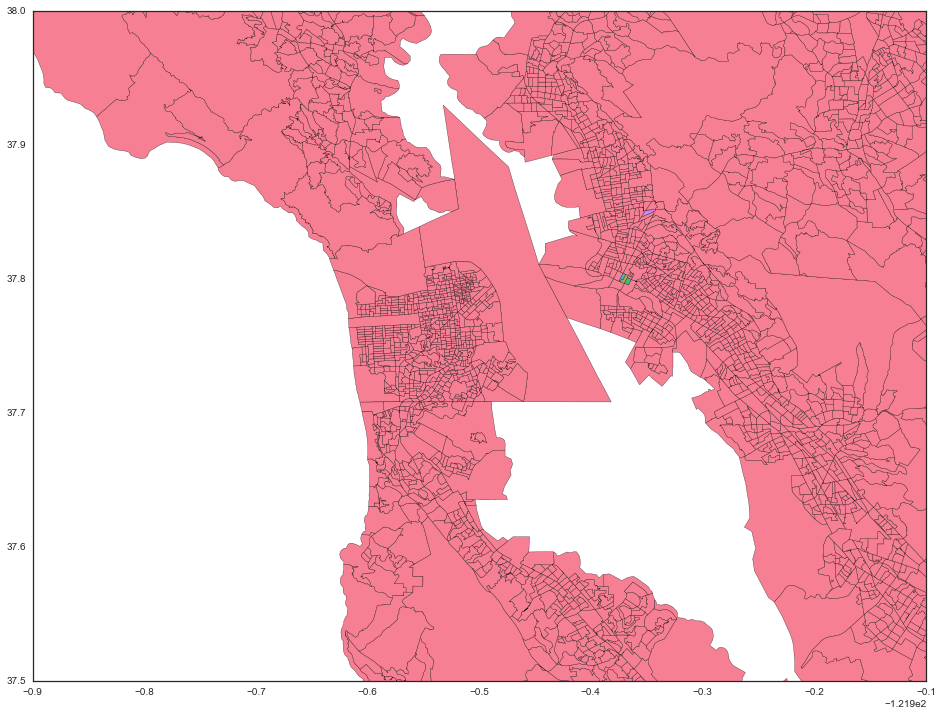

In [60]:
make_map(data, "pred_js")

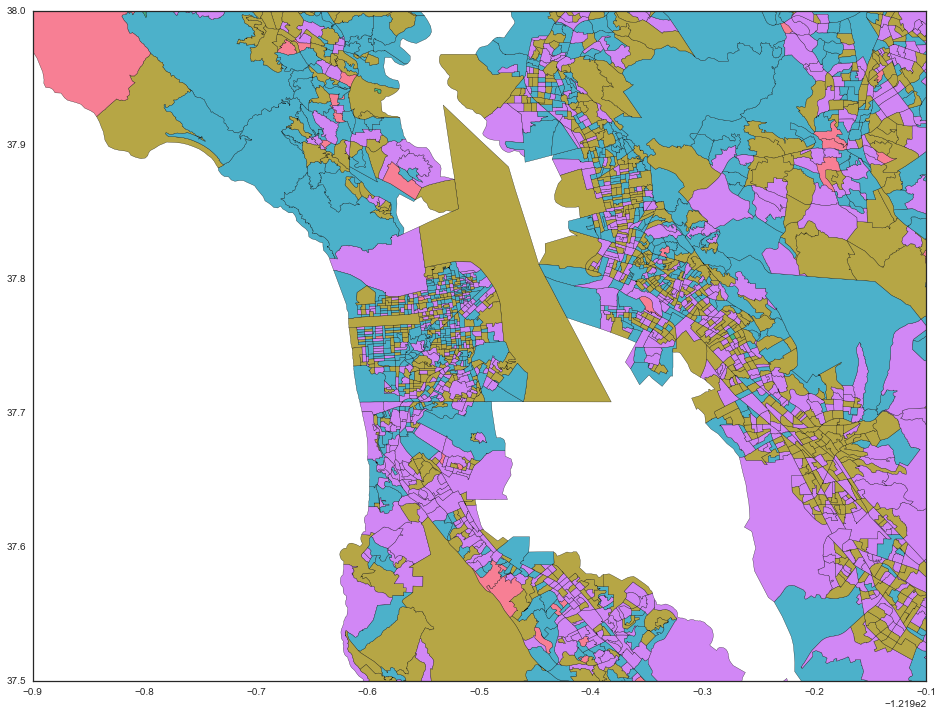

In [75]:
make_map(data, "pred_minority")

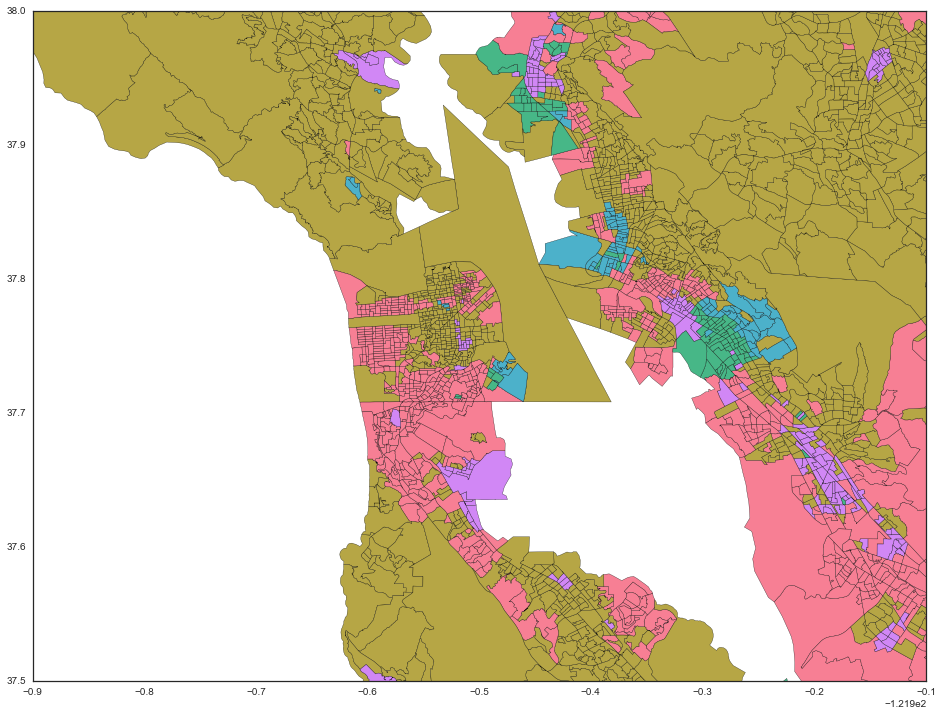

In [67]:
make_map(data, "pred_cos")

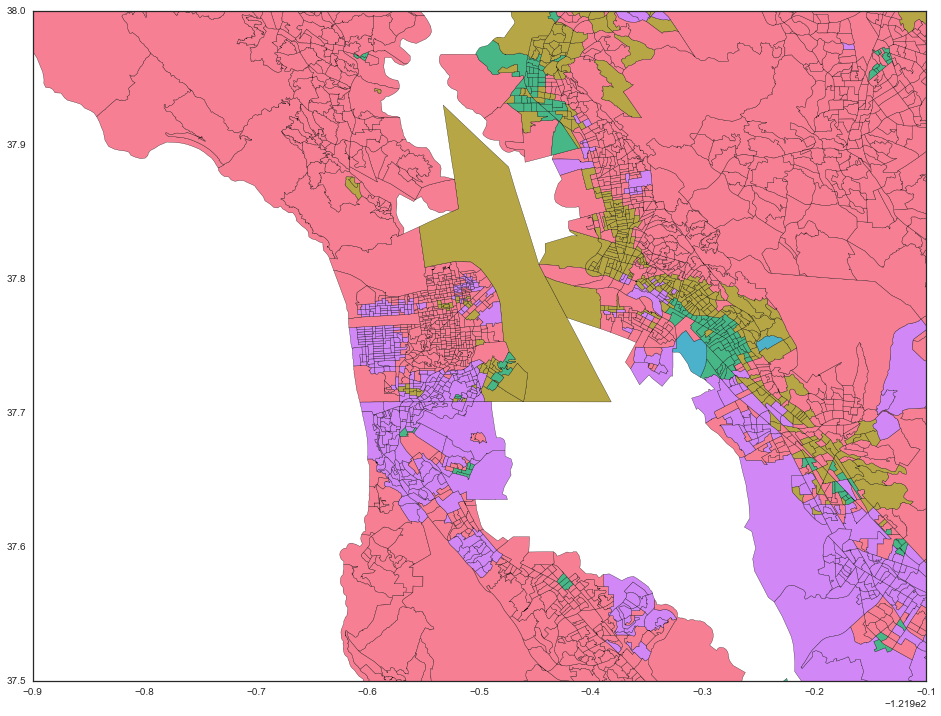

In [69]:
make_map(data, "pred_modjs")

<h3>Evaluating Clustering</h3>

For each clustering, we can define the cluster center as the proportions derived from the sum of all counts.  We can then measure the distance from the cluster for all points inside and outside of the cluster

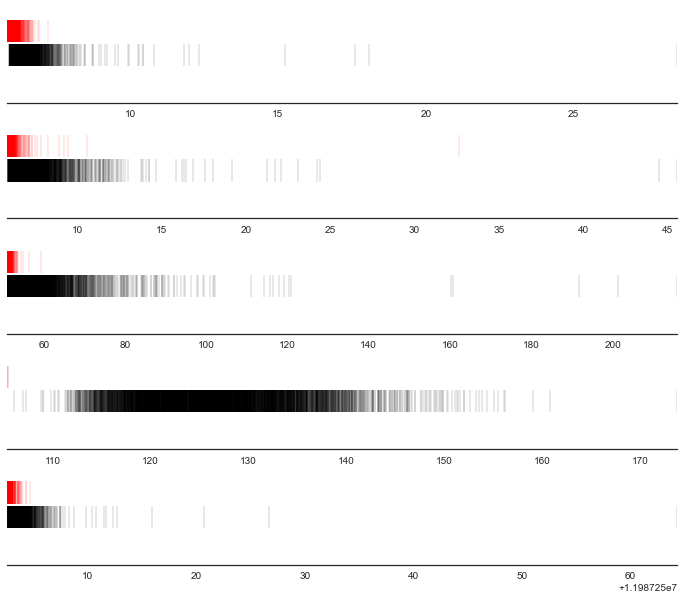

In [161]:
centers = np.zeros((5, 7))
clusters = data.pred_modjs.values
raw = data.values[:,0:7]
for i in xrange(5):
    mask = (clusters == i)
    members = data.values[np.ix_(mask)][:,0:7]
    centers[i] = np.sum(members, axis=0)
    
fig, ax = plt.subplots(5, 1)
fig.set_size_inches(12, 10)
colors = ["black","red"]
for i in range(5):
    distances = np.zeros(len(data))
    proportions = data.values[:,0:7] / np.sum(data.values[:,0:7], axis=1)[:,np.newaxis]
    for j in xrange(len(data)):
        M = np.divide(raw[j] + centers[i], np.sum(raw[j] + centers[i]))
        distances[j] = (np.dot(proportions[j], np.log(proportions[j] / M)) + np.dot(centers[i], np.log(centers[i] / M)))/2
    
    ax[i].scatter(distances, map(lambda x: int(x == i)/10.0, data.pred_modjs),
                  color=map(lambda x: colors[int(x == i)], data.pred_modjs),
                  s=500, alpha=0.6, marker="|")
    ax[i].set_xlim(min(distances), max(distances))
    ax[i].set_ylim(-0.2, 0.2)
    ax[i].set_yticks([])
    
sns.despine(left=True)

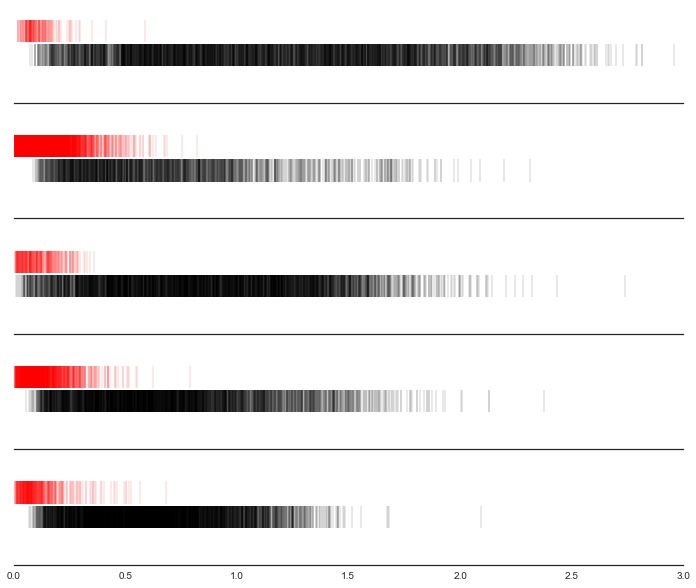

In [145]:
centers = np.zeros((5, 7))
clusters = data.pred_kl.values
for i in xrange(5):
    mask = (clusters == i)
    members = data.values[np.ix_(mask)][:,0:7]
    centers[i] = np.sum(members, axis=0) / np.sum(np.sum(members, axis=0))
    
  
fig, ax = plt.subplots(5, 1, sharex=True)
fig.set_size_inches(12, 10)
colors = ["black","red"]
for i in range(5):
    distances = np.zeros(len(data))
    proportions = data.values[:,0:7] / np.sum(data.values[:,0:7], axis=1)[:,np.newaxis]
    distances = (np.sum(centers[i] * np.log(centers[i] / proportions), axis=1) +
            np.sum(proportions * np.log(proportions / centers[i]), axis=1)) / 2
    ax[i].scatter(distances, map(lambda x: int(x == i)/10.0, data.pred_kl),
                  color=map(lambda x: colors[int(x == i)], data.pred_kl),
                  s=500, alpha=0.6, marker="|")
    ax[i].set_xlim(0, 3)
    ax[i].set_ylim(-0.2, 0.2)
    ax[i].set_yticks([])
    
sns.despine(left=True)

<h3>Algorithm</h3>
Randomly Initialize Cluster Centers - Draw from $Dir(\alpha)$ based on overall proprtions

In [21]:
n = len(data)
values = data.values[:,0:7]
assignment = np.zeros((n, 1), np.int)
kl = lambda x, y: (np.dot(x, np.log(x / y)) + np.dot(y, np.log(y / x))) / 2
n_clusters = 6
centers = np.random.dirichlet((np.round(np.sum(values, axis=0) / 10000)), n_clusters)
max_iterations = 20
iterations = 0

while(iterations < max_iterations):
    # Compute Membership
    for i in xrange(n):
        distances = np.zeros(n_clusters, np.float)
        for j in xrange(n_clusters):
            distances[j] = kl(values[i] / np.sum(values[i]), centers[j])
        assignment[i] = np.argmin(distances)

    centers = np.zeros((n_clusters, 7))

    #Move to new cluster center
    for i in xrange(n_clusters):
        mask = (assignment == i)[:,0]
        members = values[np.ix_(mask)]
        centers[i] = np.sum(members, axis=0) / np.sum(np.sum(members, axis=0))
    iterations += 1
   
    
    

In [147]:
distances

array([ 23974508.89901325,  23974506.21977459,  23974506.03928867, ...,
        23974506.71817266,  23974505.89052558,  23974506.26294518])

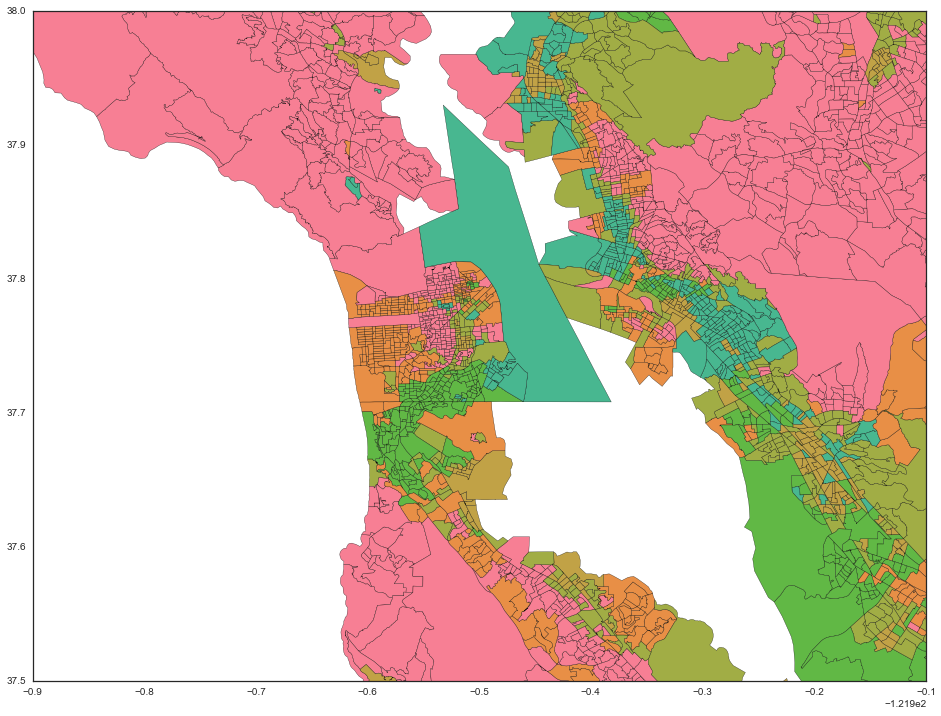

In [27]:
data['kmeans'] = assignment
make_map(data, "kmeans")

In [86]:
values.shape

(4742, 7)

In [90]:
values[mask].shape[0]/7

96

In [15]:
argraw = np.argmax(data.values, axis=1)

In [30]:
np.unique(np.argsort(data.values, axis=1)[:, 1])

array([2, 3, 4, 5, 6])

In [23]:
argraw = np.argsort(data.values, axis=1)[:, 1]

In [25]:
argraw.shape

(4742,)

In [42]:
data.values[:,0:6].shape

(4742, 6)

In [47]:
cossim

array([[  0.00000000e+00,   1.54226435e-01,   1.20434050e-01, ...,
          3.43897927e-01,   2.08160336e-01,   2.13281568e-01],
       [  1.54226435e-01,   1.49011612e-08,   6.42454809e-02, ...,
          2.64709608e-01,   5.72094779e-02,   6.41870328e-02],
       [  1.20434050e-01,   6.42454809e-02,   0.00000000e+00, ...,
          2.48951470e-01,   1.08521726e-01,   1.04290827e-01],
       ..., 
       [  3.43897927e-01,   2.64709608e-01,   2.48951470e-01, ...,
          0.00000000e+00,   2.50684226e-01,   2.34395587e-01],
       [  2.08160336e-01,   5.72094779e-02,   1.08521726e-01, ...,
          2.50684226e-01,              nan,   2.50058576e-02],
       [  2.13281568e-01,   6.41870328e-02,   1.04290827e-01, ...,
          2.34395587e-01,   2.50058576e-02,   0.00000000e+00]])

In [56]:
cossim[np.isnan(cossim)].shape

(1171,)

In [73]:
np.unique(np.argsort(data.values[:,0:7])[:,1])

array([2, 3, 4, 5, 6])

In [93]:
data.values[:,0:7] / np.sum(data.values[:,0:7], axis=1)[:,np.newaxis]

array([[ 0.04165196,  0.73385104,  0.04977056, ...,  0.1613131 ,
         0.00317684,  0.00917755],
       [ 0.06864754,  0.8545082 ,  0.00717213, ...,  0.06454918,
         0.00102459,  0.00204918],
       [ 0.09378408,  0.77862595,  0.02835333, ...,  0.09269357,
         0.00109051,  0.00327154],
       ..., 
       [ 0.20127389,  0.66751592,  0.00254777, ...,  0.01528662,
         0.00254777,  0.00382166],
       [ 0.07666667,  0.88833333,  0.00666667, ...,  0.01666667,
         0.00166667,  0.00166667],
       [ 0.09611452,  0.87014315,  0.00408998, ...,  0.01635992,
         0.00408998,  0.00511247]])

In [111]:
i = 0


In [115]:
min(distances)

0.017763132724721901

In [152]:
M

array([ 0.17342029,  0.24472115,  0.0341561 ,  0.0023674 ,  0.53612654,
        0.0061213 ,  0.00308723])

In [157]:
centers[i]

array([ 290210.,  408810.,   57173.,    3959.,  897455.,   10243.,    5163.])